In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [4]:
df = pd.read_csv("Documents/Python/Tutorial/Machine_learning/Refactored_Py_DS_ML_Bootcamp-master/10-Data-Capstone-Projects/911.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [7]:
#Finding the top 5 zip codes
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [8]:
#Finding the top 5 townships
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [11]:
#Finding how many unique titles there are for 911 calls
df['title'].nunique()

110

In [15]:
#Separating title into a Reasons column that shows 911 call group
df['reason'] = df['title'].apply(lambda x: x.split(':')[0])
df['reason'].head(5)

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: reason, dtype: object

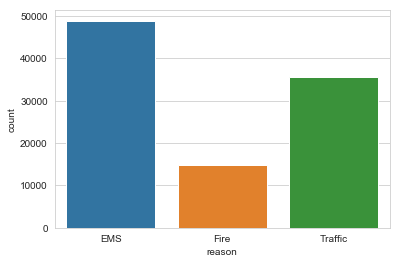

In [16]:
sns.countplot(x = 'reason', data = df)

In [18]:
type(df['timeStamp'][0])

str

In [19]:
#Converting timeStamp colume to a date/time pandas object
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [37]:
#Creating hour, month and day of the week columns
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['month'] = df['timeStamp'].apply(lambda x: x.month)
df['day'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [45]:
#Mapping integers of days of the week to strings
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day_str'] = df['day'].map(dmap)

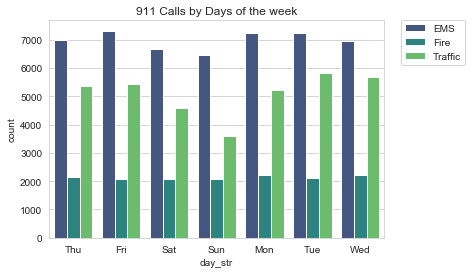

In [46]:
sns.countplot(x='day_str',data=df,hue='reason',palette='viridis').set_title("911 Calls by Days of the week")

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

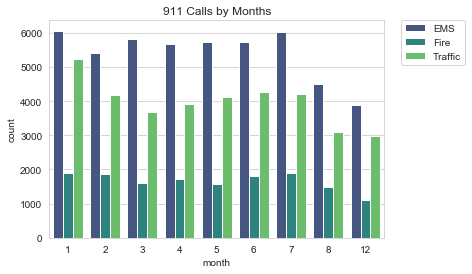

In [47]:
sns.countplot(x='month',data=df,hue='reason',palette='viridis').set_title("911 Calls by Months")

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [49]:
#MISSING months 9, 10 and 11!!!
byMonth = df.groupby('month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day,Day of Week,day_str
month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423


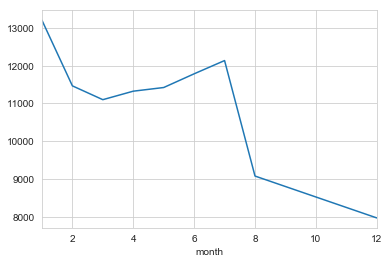

In [50]:
# Could be any column
byMonth['day'].plot()

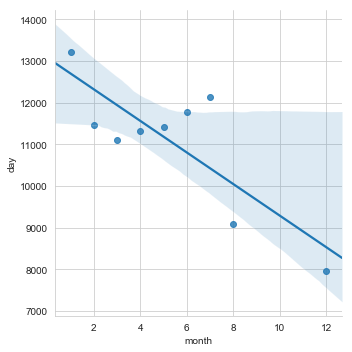

In [52]:
sns.lmplot(x = 'month', y = 'day', data = byMonth.reset_index())

In [68]:
#creating a Date column
df['date'] = df['timeStamp'].apply(lambda x: x.date())
byDate = df.groupby('date').count()

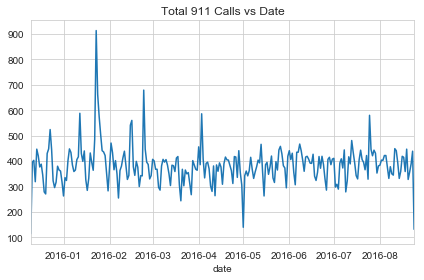

In [69]:
byDate['timeStamp'].plot().set_title('Total 911 Calls vs Date')
plt.tight_layout()

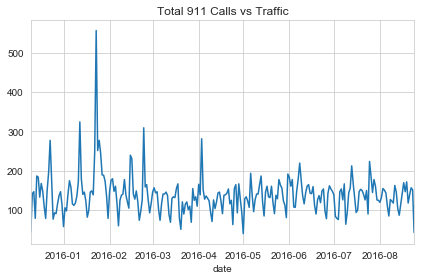

In [71]:
#can't use 'date' as a column since it is turned into the index with .groupby()
df[df['reason']=='Traffic'].groupby('date').count()['day'].plot()
plt.title('Total 911 Calls vs Traffic')
plt.tight_layout()

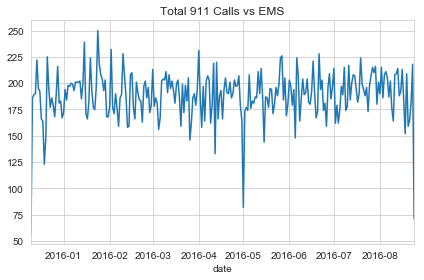

In [72]:
df[df['reason']=='EMS'].groupby('date').count()['day'].plot()
plt.title('Total 911 Calls vs EMS')
plt.tight_layout()

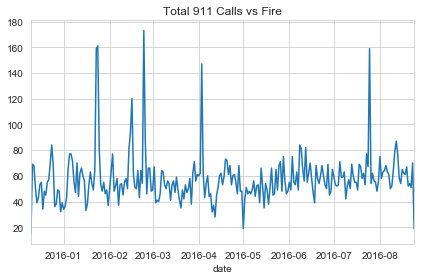

In [73]:
df[df['reason']=='Fire'].groupby('date').count()['day'].plot()
plt.title('Total 911 Calls vs Fire')
plt.tight_layout()

In [98]:
byDay = df.groupby(by=['day_str', 'hour']).count()['reason'].unstack()
byDay['index'] = pd.Categorical([ 'Mon', 'Tue','Wed' ,'Thu' ,'Fri', 'Sat', 'Sun'],
              ordered=True)
byDay = byDay.set_index('index')

Text(0.5, 1.0, 'Heatmap of occurences of 911 Calls by Day/Hour')

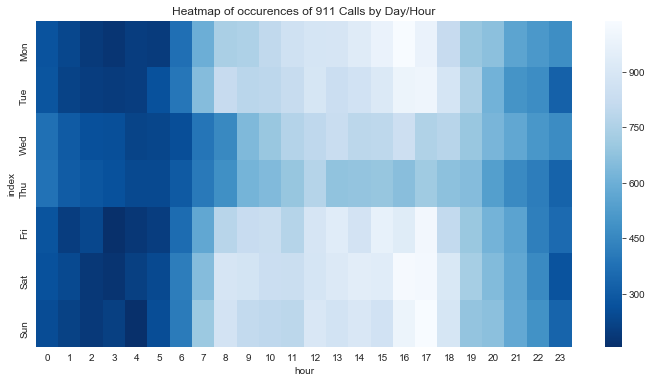

In [106]:
plt.figure(figsize=(12,6))
sns.heatmap(byDay,cmap='Blues_r').set_title('Heatmap of occurences of 911 Calls by Day/Hour')

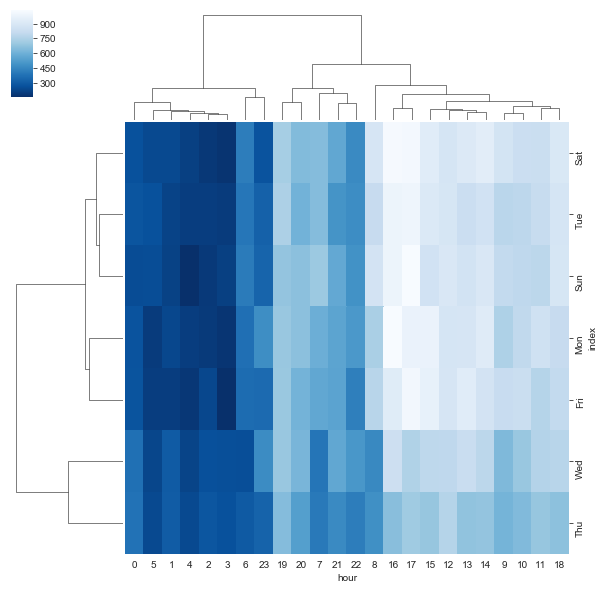

In [108]:
sns.clustermap(byDay,cmap='Blues_r')

In [116]:
byMonth = df.groupby(by=['day_str','month']).count()['reason'].unstack()
byMonth['index'] = pd.Categorical([ 'Mon', 'Tue','Wed' ,'Thu' ,'Fri', 'Sat', 'Sun'],
              ordered=True)
byMonth = byMonth.set_index('index')
byMonth.head()

month,1,2,3,4,5,6,7,8,12
index,,,,,,,,,
Mon,1970,1581,1525,1958,1730,1649,2045,1310,1065
Tue,1727,1964,1535,1598,1779,1617,1692,1511,1257
Wed,2291,1441,1266,1734,1444,1388,1695,1099,978
Thu,1960,1229,1102,1488,1424,1333,1672,1021,907
Fri,1584,1596,1900,1601,1590,2065,1646,1230,1266


Text(0.5, 1.0, 'Heatmap of occurences of 911 Calls by Month/Day')

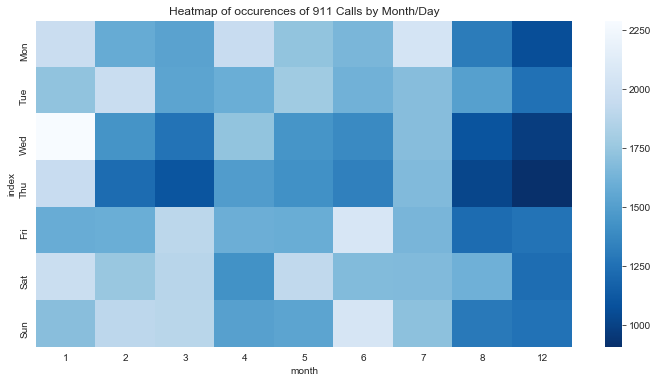

In [117]:
plt.figure(figsize=(12,6))
sns.heatmap(byMonth,cmap='Blues_r').set_title('Heatmap of occurences of 911 Calls by Month/Day')

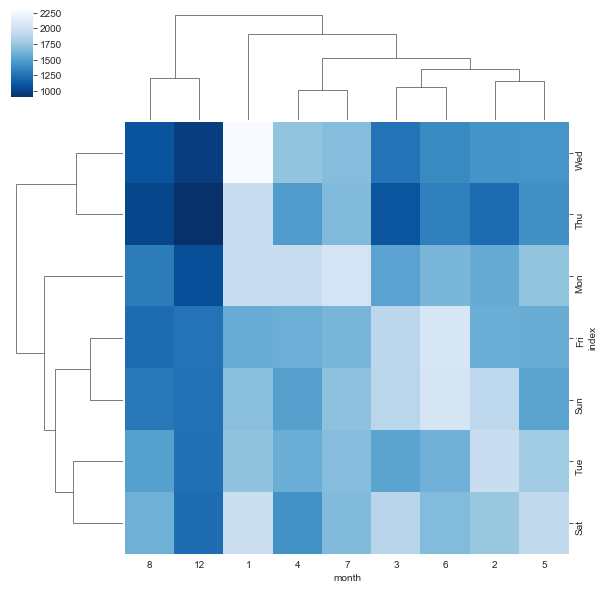

In [119]:
sns.clustermap(byMonth,cmap='Blues_r')